In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
# Assuming 'sales.csv' has columns 'Order Date' and 'Sales'
df = pd.read_csv('sales.csv')


In [5]:
# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())



Initial Dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Produ

In [6]:
# Step 2: Check for Duplicates
# Check for duplicate rows based on all columns
duplicates = df.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())

# Display duplicate rows (if any)
if duplicates.sum() > 0:
    print("\nDuplicate Rows:")
    print(df[duplicates])

# Step 3: Handle Duplicates
# Drop duplicate rows (keeping the first occurrence)
df = df.drop_duplicates()

# Verify that duplicates have been removed
print("\nNumber of duplicate rows after handling:", df.duplicated().sum())



Number of duplicate rows: 0

Number of duplicate rows after handling: 0


In [7]:
# Step 3: Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any) using forward fill
df.fillna(method='ffill', inplace=True)

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())




Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Cleaned Dataset:
            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2017-11-08       1  CA-2017-152156  11/11/2017    Second Class    CG-12520   
2017-11-08       2  CA-2017-152156  11/11/2017    Second Class    CG-12520   
2017-06-12       3  CA-2017-138688  16/06/2017    Second Class    DV-13045   
2016-10-11       4  US-2016-108966  18/10/2016  Standard Class    SO-20335   
2016-10-11       5  US-2016-108966  18/10/2016  Standard Class    SO-20335   

              Customer Name    Segment       

<ipython-input-7-956edd358fd6>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
# Step 4: Aggregate Sales by Date
# Group by 'Order Date' and sum the 'Sales' column
df_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
df_sales.set_index('Order Date', inplace=True)




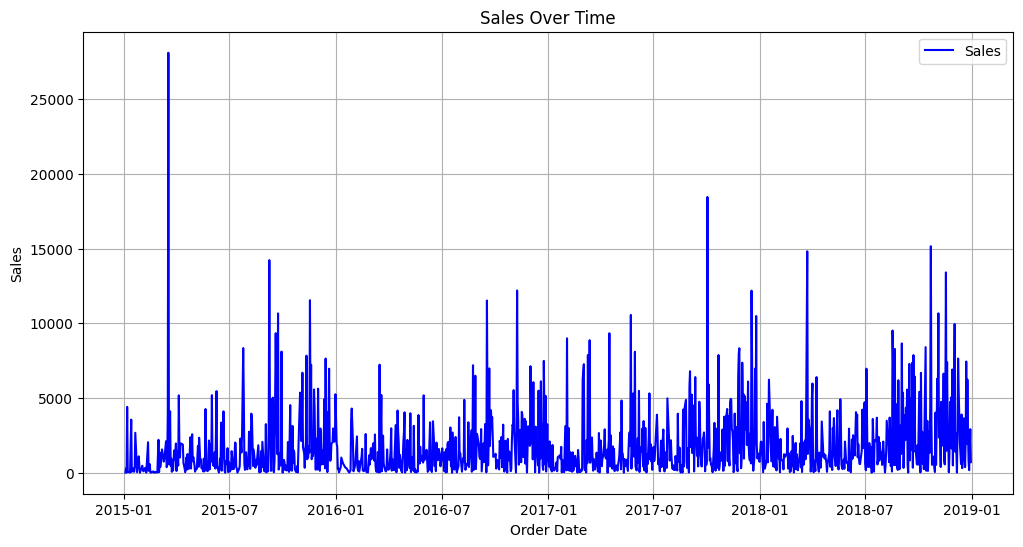

In [9]:
# Step 5: Visualize the Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(df_sales.index, df_sales['Sales'], label='Sales', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-61fb3780ac04>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_sales.resample('M').sum()


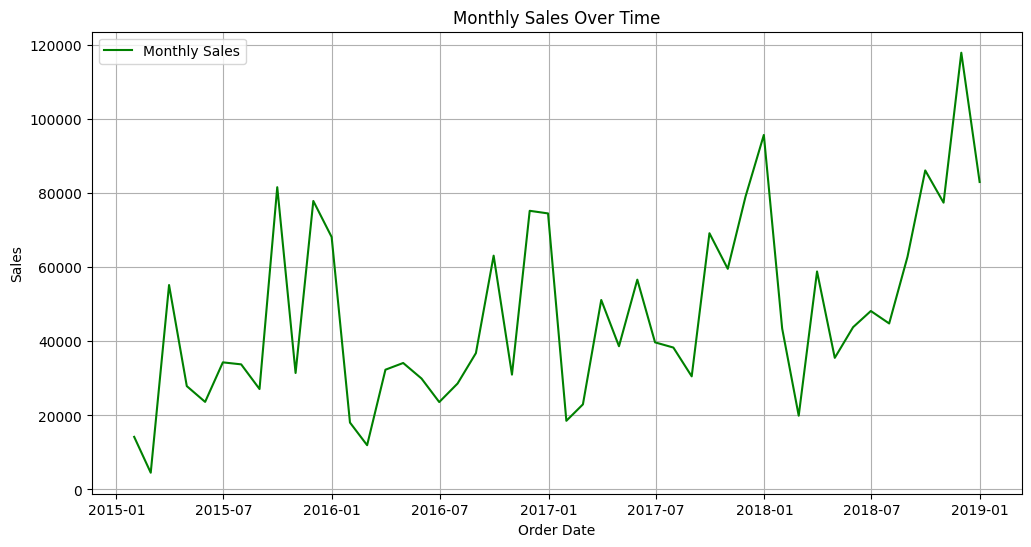

In [10]:
# Step 6: Resampling (Optional)
# Resample data to monthly frequency (if data is daily)
df_resampled = df_sales.resample('M').sum()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Sales'], label='Monthly Sales', color='green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Step 7: Split the Dataset into Train and Test Sets
# Define the split ratio (e.g., 80% train, 20% test)
train_size = int(len(df_sales) * 0.8)
train, test = df_sales.iloc[:train_size], df_sales.iloc[train_size:]

# Step 8: Save the Train and Test Sets (Optional)
train.to_csv('train_sales.csv')
test.to_csv('test_sales.csv')

print("\nTraining and Testing datasets saved as 'train_sales.csv' and 'test_sales.csv'.")


Training and Testing datasets saved as 'train_sales.csv' and 'test_sales.csv'.
